## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.linear_model import LinearRegression
from scipy.stats import bartlett
from scipy.stats import levene
import seaborn as sns
from statsmodels.regression import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [5]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [56]:
# answer below:
rev = reviews.drop(columns=['App', 'Category', 'Size', 'Installs', 'Last Updated', 'Current Ver', 'Genres', 'Android Ver'], axis=1)
rev = rev.dropna()
type_dummies = pd.get_dummies(rev['Type'], drop_first=True)
content_dummies = pd.get_dummies(rev['Content Rating'], drop_first=True)
data = rev.drop(columns=['Type', 'Content Rating'], axis=1)
clean_data = pd.concat([data, type_dummies, content_dummies], axis=1)
clean_data['Reviews'] = clean_data['Reviews'].apply(lambda x: float(x))
def money_to_float(money):
  if money[0] == '$':
    money = money[1::]
  return float(money)
clean_data['Price'] = clean_data['Price'].apply(lambda x: money_to_float(x))
clean_data = clean_data[clean_data['Rating'] <=5.0]



In [59]:
normalized = QuantileTransformer()
normal_data = pd.DataFrame(normalized.fit_transform(clean_data), columns=clean_data.columns)
normal_data

,Rating,Reviews,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,0.311812,0.238238,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.174675,0.367708,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.909910,0.757087,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.739740,0.830364,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.508509,0.367708,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9361,0.243744,0.050050,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9362,0.739740,0.141642,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9363,1.000000,0.028529,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9364,0.739740,0.214214,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
y = normal_data['Rating']
X = normal_data.iloc[:, 1::]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

In [61]:
#answer below:

linear = sm.OLS(y_train, X_train)
fit = linear.fit()
fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     35.60
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           8.97e-56
Time:                        19:43:25   Log-Likelihood:                -1197.9
No. Observations:                7492   AIC:                             2414.
Df Residuals:                    7483   BIC:                             2476.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6134      0.284      2.158      0.031       0.056       1.171
Reviews          0.1796      0.012     15.237      0.000       0.157       0.203
Price           -1.4294      0.644     -2.221      0.026      -2.691      -0.168
Paid             1.4936      0.622      2.403      0.016       0.275       2.712
Everyone        -0.2049      0.284     -0.721      0.471      -0.762       0.352
Everyone 10+    -0.2142      0.285     -0.753      0.452      -0.772       0.344
Mature 17+      -0.2658      0.284     -0.934      0.350      -0.824       0.292
Teen            -0.2241      0.284     -0.788      0.430      -0.781       0.333
Unrated         -0.3701      0.402     -0.921      0.357      -1.158       0.418
==============================================================================
Omnibus:                     1469.292   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              338.018
Skew:                           0.194   Prob(JB):                     3.98e-74
Kurtosis:                       2.034   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

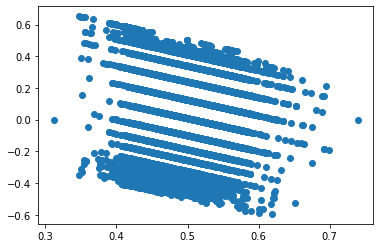

bartlett stats:  BartlettResult(statistic=14659.574183719835, pvalue=0.0)
levene stats:  LeveneResult(statistic=12145.15330040455, pvalue=0.0)


In [62]:
prediction = fit.predict(X_train)
residual = (y_train - prediction)

bart_stats = bartlett(residual, prediction)
lev_stats = levene(residual, prediction)

plt.scatter(prediction, residual)
plt.show()

print('bartlett stats: ', bart_stats)
print('levene stats: ', lev_stats)

In [63]:
vif = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
vif

const           7498.379255
Reviews            1.078864
Price           2229.390804
Paid            2229.764926
Everyone        1245.378906
Everyone 10+     319.160186
Mature 17+       344.572012
Teen             778.296839
Unrated            1.999912
dtype: float64

Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

In [64]:
#answer below:

y1 = normal_data['Rating']
X1 = normal_data[['Reviews','Price', 'Paid']]
X1 = sm.add_constant(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)


In [65]:
linear1 = sm.OLS(y_train1, X_train1)
fit1 = linear1.fit()
fit1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     80.07
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           5.54e-51
Time:                        19:43:57   Log-Likelihood:                -1185.3
No. Observations:                7492   AIC:                             2379.
Df Residuals:                    7488   BIC:                             2406.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4120      0.007     59.975      0.000       0.399       0.425
Reviews        0.1640      0.012     14.200      0.000       0.141       0.187
Price         -1.4688      0.628     -2.338      0.019      -2.700      -0.237
Paid           1.5307      0.607      2.523      0.012       0.342       2.720
==============================================================================
Omnibus:                     1668.909   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              345.586
Skew:                           0.176   Prob(JB):                     9.06e-76
Kurtosis:                       2.008   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

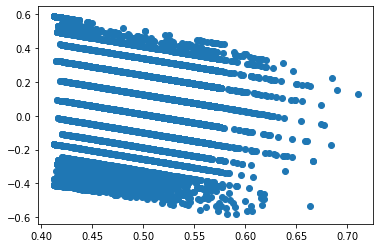

bartlett stats:  BartlettResult(statistic=15852.614304159099, pvalue=0.0)
levene stats:  LeveneResult(statistic=12948.645775692972, pvalue=0.0)


In [66]:
prediction1 = fit1.predict(X_train1)
residual1 = (y_train1 - prediction1)

bart_stats = bartlett(residual1, prediction1)
lev_stats = levene(residual1, prediction1)

plt.scatter(prediction1, residual1)
plt.show()

print('bartlett stats: ', bart_stats)
print('levene stats: ', lev_stats)

In [67]:
vif1 = pd.Series([variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])], index=X_train1.columns)
vif1

const         4.398491
Reviews       1.039648
Price      2175.125683
Paid       2175.533157
dtype: float64

Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

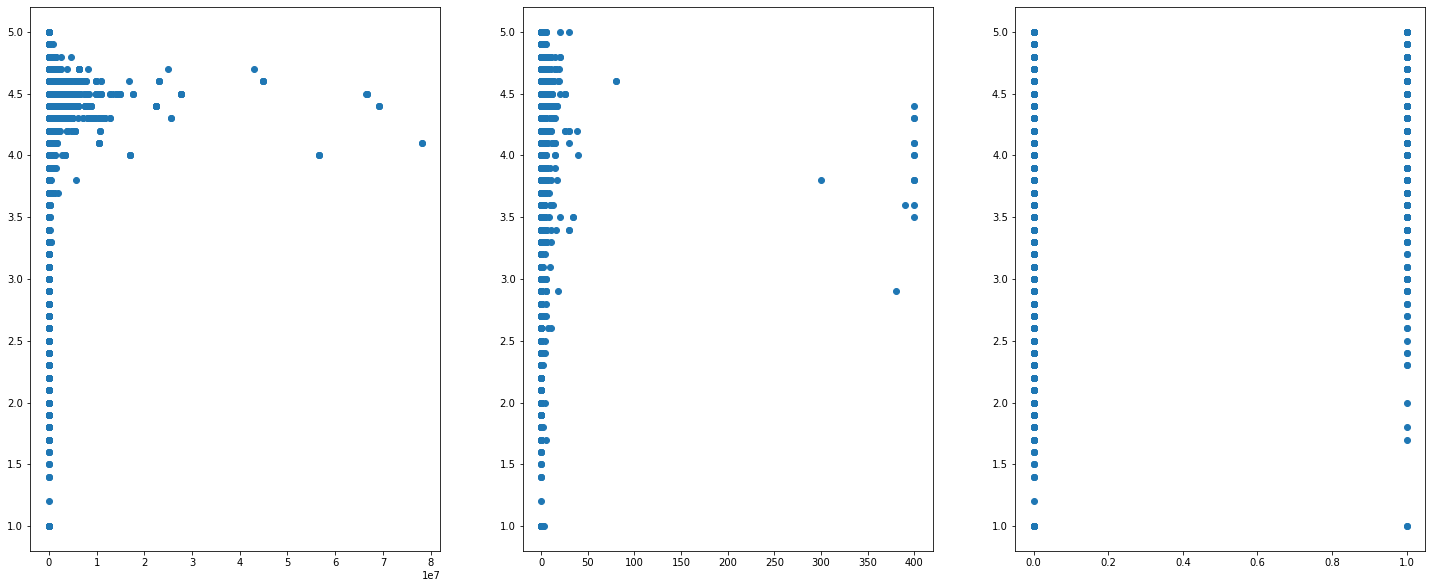

In [68]:
# answer below:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.scatter(clean_data['Reviews'], clean_data['Rating'])
plt.subplot(1,3,2)
plt.scatter(clean_data['Price'], clean_data['Rating'])
plt.subplot(1,3,3)
plt.scatter(clean_data['Paid'], clean_data['Rating'])

plt.show()



Do you think given these graphs, these variables have good predictive power?

No, I do not believe given these graphs that these variables have good predictive power. 

What data processing could you do to improve this model? Experiment.

None of the variables have a correlation with ratings. It would be best to collect more data to analyze. 

In [49]:
reviews.describe(include='O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [71]:
normal_data.describe()

,Rating,Reviews,Price,Paid,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
count,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000,9366.000000
mean,0.499492,0.499991,0.066691,0.069080,0.792227,0.042387,0.049221,0.115738,0.000107
std,0.289388,0.288746,0.244891,0.253603,0.405735,0.201482,0.216340,0.319927,0.010333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243744,0.249875,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.508509,0.500055,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.739740,0.750071,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


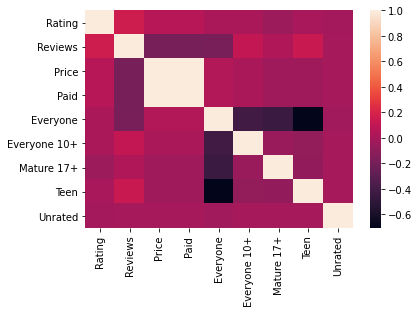

In [72]:
sns.heatmap(normal_data.corr())

In [74]:
clean_data['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64